<a href="https://colab.research.google.com/github/Zad-100/EEG_DSAI_Project/blob/main/EEG_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
data=pd.read_csv("/content/gdrive/MyDrive/Dataset/mergedTrialData_withTarget.csv")

In [ ]:
data.head()

,Unnamed: 0,subject,trial,condition,ITI,rejected,Fz_N100,FCz_N100,Cz_N100,FC3_N100,...,Fz_B1,FCz_B1,Cz_B1,FC3_B1,FC4_B1,C3_B1,C4_B1,CP3_B1,CP4_B1,group
0,0,1,1,1,NaN,0,-9.761338,-11.545219,-16.775214,-3.576595,...,-14.815963,-23.173850,-25.626646,-13.285282,-23.223037,-23.622596,-19.071931,-19.529142,-26.677147,0
1,1,1,2,1,2025.3906,0,8.717519,11.462619,7.979110,9.429738,...,19.337457,18.359870,15.224155,13.442292,16.981404,11.953868,10.168470,5.831319,6.503993,0
2,2,1,3,1,2303.7109,0,-4.027286,-3.992038,-1.104119,-3.319471,...,5.443106,1.081921,0.316871,1.199502,0.929950,1.343815,3.131847,3.691148,0.338882,0
3,3,1,4,1,2275.3906,0,0.394095,-0.663186,-1.372871,3.974643,...,5.417850,3.702130,7.823421,5.336565,-0.448384,7.983687,6.579145,8.474662,9.381523,0
4,4,1,5,1,2464.8438,0,-9.368090,-12.029829,-10.280100,-7.846471,...,-6.464376,-6.817497,-6.286747,0.212776,-5.815893,2.517058,-1.101036,-4.325141,-4.832745,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23986 entries, 0 to 23985
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  23986 non-null  int64  
 1   subject     23986 non-null  int64  
 2   trial       23986 non-null  int64  
 3   condition   23986 non-null  int64  
 4   ITI         23743 non-null  float64
 5   rejected    23986 non-null  int64  
 6   Fz_N100     23201 non-null  float64
 7   FCz_N100    23201 non-null  float64
 8   Cz_N100     23201 non-null  float64
 9   FC3_N100    23201 non-null  float64
 10  FC4_N100    23201 non-null  float64
 11  C3_N100     23201 non-null  float64
 12  C4_N100     23201 non-null  float64
 13  CP3_N100    23201 non-null  float64
 14  CP4_N100    23201 non-null  float64
 15  Fz_P200     23201 non-null  float64
 16  FCz_P200    23201 non-null  float64
 17  Cz_P200     23201 non-null  float64
 18  FC3_P200    23201 non-null  float64
 19  FC4_P200    23201 non-nul

In [ ]:
data.rejected.value_counts()

0    23201
1      785
Name: rejected, dtype: int64

In [ ]:
data.drop(data.loc[data['rejected']==1].index, inplace=True)

In [ ]:
data.rejected.value_counts()

0    23201
Name: rejected, dtype: int64

In [ ]:
#checking is the data is imbalanced
data.group.value_counts()

1    13975
0     9226
Name: group, dtype: int64

In [ ]:
#the data we have is slightly imbalanced!
13975/(13975+9226)

0.6023447265204086

In [ ]:
#it is in the ratio of 60 40!
#now check for missing values in the data
data.isna().sum()

Unnamed: 0      0
subject         0
trial           0
condition       0
ITI           195
rejected        0
Fz_N100         0
FCz_N100        0
Cz_N100         0
FC3_N100        0
FC4_N100        0
C3_N100         0
C4_N100         0
CP3_N100        0
CP4_N100        0
Fz_P200         0
FCz_P200        0
Cz_P200         0
FC3_P200        0
FC4_P200        0
C3_P200         0
C4_P200         0
CP3_P200        0
CP4_P200        0
Fz_B0           0
FCz_B0          0
Cz_B0           0
FC3_B0          0
FC4_B0          0
C3_B0           0
C4_B0           0
CP3_B0          0
CP4_B0          0
Fz_B1           0
FCz_B1          0
Cz_B1           0
FC3_B1          0
FC4_B1          0
C3_B1           0
C4_B1           0
CP3_B1          0
CP4_B1          0
group           0
dtype: int64

<Axes: xlabel='index'>

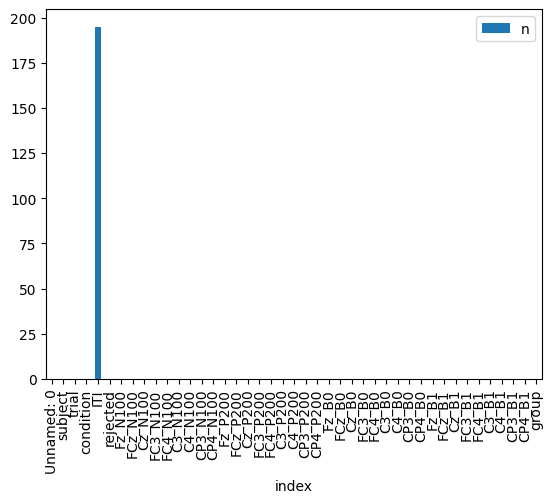

In [ ]:
data.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=450)

In [ ]:
#what the values of ITI looks like
data.ITI.head()

0          NaN
1    2025.3906
2    2303.7109
3    2275.3906
4    2464.8438
Name: ITI, dtype: float64

In [ ]:
#we should fill the NaN values with mean value!
mean_value=data['ITI'].mean()
  
# Replace NaNs in column ITI with the
# mean of values in the same column
data['ITI'].fillna(value=mean_value, inplace=True)

In [ ]:
data.isna().sum()

Unnamed: 0    0
subject       0
trial         0
condition     0
ITI           0
rejected      0
Fz_N100       0
FCz_N100      0
Cz_N100       0
FC3_N100      0
FC4_N100      0
C3_N100       0
C4_N100       0
CP3_N100      0
CP4_N100      0
Fz_P200       0
FCz_P200      0
Cz_P200       0
FC3_P200      0
FC4_P200      0
C3_P200       0
C4_P200       0
CP3_P200      0
CP4_P200      0
Fz_B0         0
FCz_B0        0
Cz_B0         0
FC3_B0        0
FC4_B0        0
C3_B0         0
C4_B0         0
CP3_B0        0
CP4_B0        0
Fz_B1         0
FCz_B1        0
Cz_B1         0
FC3_B1        0
FC4_B1        0
C3_B1         0
C4_B1         0
CP3_B1        0
CP4_B1        0
group         0
dtype: int64

## great now we don't have any missing data in our dataset!

# Split data into train and valid set!

In [ ]:
y=data.group
X=data.drop(["group"],axis=1)


In [ ]:
y.info()
X.info()

<class 'pandas.core.series.Series'>
Int64Index: 23201 entries, 0 to 23985
Series name: group
Non-Null Count  Dtype
--------------  -----
23201 non-null  int64
dtypes: int64(1)
memory usage: 362.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23201 entries, 0 to 23985
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  23201 non-null  int64  
 1   subject     23201 non-null  int64  
 2   trial       23201 non-null  int64  
 3   condition   23201 non-null  int64  
 4   ITI         23201 non-null  float64
 5   rejected    23201 non-null  int64  
 6   Fz_N100     23201 non-null  float64
 7   FCz_N100    23201 non-null  float64
 8   Cz_N100     23201 non-null  float64
 9   FC3_N100    23201 non-null  float64
 10  FC4_N100    23201 non-null  float64
 11  C3_N100     23201 non-null  float64
 12  C4_N100     23201 non-null  float64
 13  CP3_N100    23201 non-null  float64
 14  CP4_N100    23201 non-null  flo

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
len(X_train),len(X_test),len(y_train),len(y_test)

(16240, 6961, 16240, 6961)

In [ ]:
X_train.head()

,Unnamed: 0,subject,trial,condition,ITI,rejected,Fz_N100,FCz_N100,Cz_N100,FC3_N100,...,CP4_B0,Fz_B1,FCz_B1,Cz_B1,FC3_B1,FC4_B1,C3_B1,C4_B1,CP3_B1,CP4_B1
8459,8459,29,23,2,1295.8984,0,-8.105519,-7.411657,-3.121529,-3.768148,...,0.017128,1.971358,3.939828,4.594071,3.066619,4.048323,3.468494,-2.301224,-1.099881,2.418776
7934,7934,27,93,2,1321.2891,0,-35.956743,-39.063933,-28.659090,-29.357148,...,0.021960,-7.225226,-7.835348,-4.076767,11.535545,-8.380616,-4.658989,-14.434220,0.820042,-7.310679
6202,6202,21,50,3,1668.9453,0,-11.343857,-9.501405,-6.365481,-11.475033,...,-0.013829,-0.841321,1.709410,1.770767,3.971057,2.998950,3.013514,0.352533,4.479288,6.492026
18739,18739,64,12,2,1391.6016,0,-12.555733,-17.907200,-20.172619,-15.837848,...,-0.068799,1.056950,5.323442,12.379778,4.912032,-3.710163,8.361182,3.783084,8.014294,3.426339
21470,21470,73,65,2,1336.9141,0,-6.889076,0.791362,-8.658467,-5.879757,...,-0.111015,5.042953,4.547161,5.938968,4.175970,5.614727,7.401748,10.059921,10.811387,12.921357


In [ ]:
X_train=X_train.drop(["Unnamed: 0"], axis=1)

In [ ]:
X_test=X_test.drop(["Unnamed: 0"], axis=1)

In [ ]:
X_train.head()

,subject,trial,condition,ITI,rejected,Fz_N100,FCz_N100,Cz_N100,FC3_N100,FC4_N100,...,CP4_B0,Fz_B1,FCz_B1,Cz_B1,FC3_B1,FC4_B1,C3_B1,C4_B1,CP3_B1,CP4_B1
8459,29,23,2,1295.8984,0,-8.105519,-7.411657,-3.121529,-3.768148,-5.936686,...,0.017128,1.971358,3.939828,4.594071,3.066619,4.048323,3.468494,-2.301224,-1.099881,2.418776
7934,27,93,2,1321.2891,0,-35.956743,-39.063933,-28.659090,-29.357148,-32.867933,...,0.021960,-7.225226,-7.835348,-4.076767,11.535545,-8.380616,-4.658989,-14.434220,0.820042,-7.310679
6202,21,50,3,1668.9453,0,-11.343857,-9.501405,-6.365481,-11.475033,-6.810452,...,-0.013829,-0.841321,1.709410,1.770767,3.971057,2.998950,3.013514,0.352533,4.479288,6.492026
18739,64,12,2,1391.6016,0,-12.555733,-17.907200,-20.172619,-15.837848,-11.454152,...,-0.068799,1.056950,5.323442,12.379778,4.912032,-3.710163,8.361182,3.783084,8.014294,3.426339
21470,73,65,2,1336.9141,0,-6.889076,0.791362,-8.658467,-5.879757,0.280486,...,-0.111015,5.042953,4.547161,5.938968,4.175970,5.614727,7.401748,10.059921,10.811387,12.921357


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23201 entries, 0 to 23985
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  23201 non-null  int64  
 1   subject     23201 non-null  int64  
 2   trial       23201 non-null  int64  
 3   condition   23201 non-null  int64  
 4   ITI         23201 non-null  float64
 5   rejected    23201 non-null  int64  
 6   Fz_N100     23201 non-null  float64
 7   FCz_N100    23201 non-null  float64
 8   Cz_N100     23201 non-null  float64
 9   FC3_N100    23201 non-null  float64
 10  FC4_N100    23201 non-null  float64
 11  C3_N100     23201 non-null  float64
 12  C4_N100     23201 non-null  float64
 13  CP3_N100    23201 non-null  float64
 14  CP4_N100    23201 non-null  float64
 15  Fz_P200     23201 non-null  float64
 16  FCz_P200    23201 non-null  float64
 17  Cz_P200     23201 non-null  float64
 18  FC3_P200    23201 non-null  float64
 19  FC4_P200    23201 non-nul

In [ ]:
from sklearn.preprocessing import StandardScaler

colsToScale = ["ITI", "Fz_N100", "FCz_N100", "Cz_N100", "FC3_N100",
                  "FC4_N100", "C3_N100", "C4_N100", "CP3_N100", "CP4_N100",
                  "Fz_P200", "FCz_P200", "Cz_P200", "FC3_P200", "FC4_P200",
                  "C3_P200", "C4_P200", "CP3_P200", "CP4_P200", "Fz_B0",
                  "FCz_B0", "Cz_B0", "FC3_B0", "FC4_B0", "C3_B0", "C4_B0",
                  "CP3_B0", "CP4_B0", "Fz_B1", "FCz_B1", "Cz_B1", "FC3_B1",
                  "FC4_B1", "C3_B1", "C4_B1", "CP3_B1", "CP4_B1"]

stdScaler = StandardScaler()
stdScaler.fit(X_train[colsToScale])
X_train[colsToScale] = stdScaler.transform(X_train[colsToScale])

X_train.head(10)

,subject,trial,condition,ITI,rejected,Fz_N100,FCz_N100,Cz_N100,FC3_N100,FC4_N100,...,CP4_B0,Fz_B1,FCz_B1,Cz_B1,FC3_B1,FC4_B1,C3_B1,C4_B1,CP3_B1,CP4_B1
8459,29,23,2,-0.277111,0,-0.488545,-0.421696,-0.092704,-0.171713,-0.361067,...,0.178708,0.118095,0.269598,0.331276,0.193413,0.308362,0.244751,-0.251828,-0.170357,0.178140
7934,27,93,2,-0.269304,0,-2.933538,-3.207828,-2.367576,-2.688525,-2.980474,...,0.233828,-0.578422,-0.719645,-0.427710,0.921387,-0.743673,-0.513731,-1.377863,0.009450,-0.685360
6202,21,50,3,-0.162400,0,-0.772831,-0.605642,-0.381674,-0.929726,-0.446051,...,-0.174425,-0.094928,0.082219,0.084144,0.271157,0.219539,0.202290,-0.005540,0.352152,0.539645
18739,64,12,2,-0.247683,0,-0.879219,-1.345546,-1.611606,-1.358831,-0.897711,...,-0.801472,0.048841,0.385837,1.012784,0.352042,-0.348347,0.701351,0.312842,0.683218,0.267562
21470,73,65,2,-0.264499,0,-0.381756,0.300359,-0.585932,-0.379401,0.243633,...,-1.283029,0.350726,0.320621,0.448999,0.288771,0.440948,0.611814,0.895380,0.945176,1.110255
16148,55,4,3,-0.125765,0,1.086978,1.018030,0.942032,0.888152,0.734565,...,1.380961,1.466013,1.425578,1.519690,1.440077,1.659156,2.004967,1.786348,2.328677,1.822593
22049,75,49,2,0.282031,0,-1.246370,-1.290720,-1.136538,-1.622584,-1.071521,...,-1.476507,0.120274,-0.139077,-0.535024,-0.492899,-1.062460,-1.071468,-0.328832,-1.288977,-0.876755
19645,67,24,2,0.009667,0,0.908632,-0.067415,-0.316545,1.597689,-0.840211,...,0.085170,-0.119297,-1.057476,-0.981342,-0.544141,-0.656396,-0.505441,-0.811771,-0.706353,-1.193440
14754,50,17,3,-0.390321,0,1.045655,1.396316,1.067744,0.377658,0.711208,...,2.189116,-0.667829,0.170270,0.376789,-0.744788,-0.148779,-0.280434,0.505240,-0.023293,1.343774
13367,46,20,1,0.363710,0,1.338654,0.989546,0.733602,0.128090,1.231218,...,-0.074984,0.106915,0.511933,-0.503568,0.342500,-0.464455,-0.169852,-0.901380,-0.263781,-0.223920


In [ ]:
from sklearn.preprocessing import StandardScaler

colsToScale = ["ITI", "Fz_N100", "FCz_N100", "Cz_N100", "FC3_N100",
                  "FC4_N100", "C3_N100", "C4_N100", "CP3_N100", "CP4_N100",
                  "Fz_P200", "FCz_P200", "Cz_P200", "FC3_P200", "FC4_P200",
                  "C3_P200", "C4_P200", "CP3_P200", "CP4_P200", "Fz_B0",
                  "FCz_B0", "Cz_B0", "FC3_B0", "FC4_B0", "C3_B0", "C4_B0",
                  "CP3_B0", "CP4_B0", "Fz_B1", "FCz_B1", "Cz_B1", "FC3_B1",
                  "FC4_B1", "C3_B1", "C4_B1", "CP3_B1", "CP4_B1"]

stdScaler = StandardScaler()
stdScaler.fit(X_test[colsToScale])
X_test[colsToScale] = stdScaler.transform(X_test[colsToScale])

X_test.head(10)

,subject,trial,condition,ITI,rejected,Fz_N100,FCz_N100,Cz_N100,FC3_N100,FC4_N100,...,CP4_B0,Fz_B1,FCz_B1,Cz_B1,FC3_B1,FC4_B1,C3_B1,C4_B1,CP3_B1,CP4_B1
266,1,69,3,0.198272,0,1.594033,1.157992,1.456223,2.244344,0.977529,...,-0.290623,-0.345736,-0.087050,-0.513615,-0.079839,-0.496337,0.173249,-0.260872,0.061932,-0.157401
21885,74,84,3,-0.487763,0,0.133715,0.952153,0.778882,0.701012,0.883403,...,-0.566559,-0.688736,-0.666146,-1.228994,-1.318690,-0.105678,-1.265424,0.034578,-1.288887,-0.602570
20992,71,84,3,-0.226481,0,-0.019313,-0.070312,-0.442714,0.009723,0.261567,...,-0.553881,0.606625,0.893392,0.029750,0.374134,0.461133,-0.153124,-0.296520,0.434035,-0.124016
8795,30,61,2,-0.604917,0,-0.677470,-0.871272,-1.158025,0.700594,-0.613625,...,-3.295619,2.019743,2.069267,1.974265,3.790568,1.928279,3.897087,1.949979,2.030312,1.092861
2067,7,84,3,-0.073090,0,0.732325,0.818801,0.600300,0.308442,0.945465,...,-1.210323,-1.288404,-1.512644,-1.443620,-0.862953,-0.666450,-1.320313,-0.736592,-0.762243,-1.137204
11504,39,43,3,-0.129488,0,0.401959,0.402913,-0.465926,0.232202,-0.164572,...,2.121409,0.173955,1.039722,0.409904,0.394662,0.651429,0.013144,1.005759,0.031108,0.541339
11145,38,79,2,-0.033040,0,0.260557,-0.573489,-1.566430,-0.762883,-0.728004,...,1.140608,1.568933,1.303954,1.416269,1.067040,1.947893,1.242436,1.810112,0.977688,1.479609
15143,52,88,1,0.153863,0,-0.295434,-0.119935,0.109978,0.136684,-0.078074,...,-2.128365,-1.135221,-1.610687,-1.655804,-0.177014,-0.960906,-1.341908,-1.213590,-0.668267,-0.383804
22664,77,68,2,0.634468,0,0.169417,0.493998,0.386315,0.686557,0.187466,...,-0.090012,0.627302,0.721648,-0.235319,0.339795,0.337533,0.717213,0.185993,0.586810,0.240687
6632,23,83,1,-0.151284,0,-0.410475,-0.187503,0.008903,0.012924,-0.375927,...,0.583826,0.091838,0.446808,0.488379,-0.414188,-0.593770,-0.307292,0.138195,-0.284421,0.392761


:now our data is preprocessed!

# Modelling experiments starts


In [ ]:
from sklearn import svm
clf_svm=svm.SVC()
clf_svm.fit(X_train,y_train)


SVC()

In [ ]:
clf_svm.predict(X_test)

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
clf_svm.score(X_test,y_test)

0.888952736675765

Now trying a non-linear svm model!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# fit the model
clf_nsvm = svm.NuSVC(gamma="auto")
clf_nsvm.fit(X_train, y_train)


NuSVC(gamma='auto')

In [ ]:
clf_nsvm.score(X_test,y_test)

0.9586266341042954

we can see.. our non linear svm model is performing very well on our data!!!!


### NOW TRYING THE RANDOMFOREST CLASSIFIER!

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
clf_rf.score(X_test,y_test)

0.896279270219796

we can see, the randomforest model outperforms the linear svm model..for now the best model has been the non-linear svm model.
we can now try the hyperparameter tuning

But before that, lets see which features are of most importance to our model

Elapsed time to compute the importances: 0.014 seconds


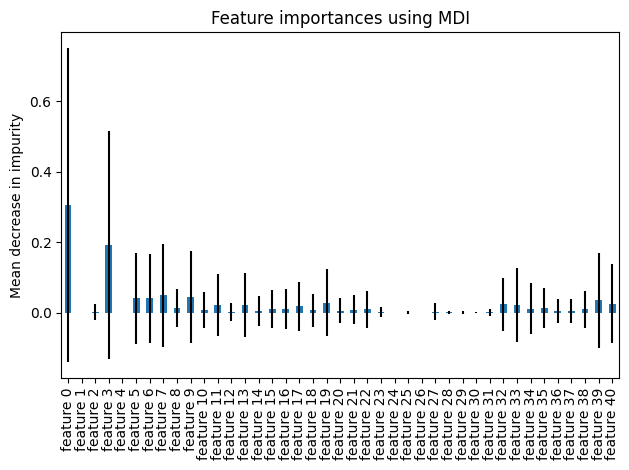

In [ ]:
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]

import time
import numpy as np

start_time = time.time()
importances = clf_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
X_train.head()

,subject,trial,condition,ITI,rejected,Fz_N100,FCz_N100,Cz_N100,FC3_N100,FC4_N100,...,CP4_B0,Fz_B1,FCz_B1,Cz_B1,FC3_B1,FC4_B1,C3_B1,C4_B1,CP3_B1,CP4_B1
8459,29,23,2,-0.277111,0,-0.488545,-0.421696,-0.092704,-0.171713,-0.361067,...,0.178708,0.118095,0.269598,0.331276,0.193413,0.308362,0.244751,-0.251828,-0.170357,0.178140
7934,27,93,2,-0.269304,0,-2.933538,-3.207828,-2.367576,-2.688525,-2.980474,...,0.233828,-0.578422,-0.719645,-0.427710,0.921387,-0.743673,-0.513731,-1.377863,0.009450,-0.685360
6202,21,50,3,-0.162400,0,-0.772831,-0.605642,-0.381674,-0.929726,-0.446051,...,-0.174425,-0.094928,0.082219,0.084144,0.271157,0.219539,0.202290,-0.005540,0.352152,0.539645
18739,64,12,2,-0.247683,0,-0.879219,-1.345546,-1.611606,-1.358831,-0.897711,...,-0.801472,0.048841,0.385837,1.012784,0.352042,-0.348347,0.701351,0.312842,0.683218,0.267562
21470,73,65,2,-0.264499,0,-0.381756,0.300359,-0.585932,-0.379401,0.243633,...,-1.283029,0.350726,0.320621,0.448999,0.288771,0.440948,0.611814,0.895380,0.945176,1.110255


Now we have an idea of what features are the most important!

# HYPERPARAMETER TUNING

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
predictions=clf_nsvm.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      2781
           1       0.94      1.00      0.97      4180

    accuracy                           0.96      6961
   macro avg       0.97      0.95      0.96      6961
weighted avg       0.96      0.96      0.96      6961



Looks like our Non_linear svm model has performed well in every domain! 

## using GridsearchCV for tuning the N- svm

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
clf_grid_nsvm = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
clf_grid_nsvm.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.603 total time=  40.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.603 total time=  40.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.603 total time=  41.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.603 total time=  40.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.603 total time=  40.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.604 total time=  21.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.604 total time=  21.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.605 total time=  22.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.605 total time=  20.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.604 total time=  21.9s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.973 total time=   4.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:

# print best parameter after tuning
print(clf_grid_nsvm.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(clf_grid_nsvm.best_estimator_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001)


In [ ]:
grid_predictions = clf_grid_nsvm.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2781
           1       1.00      1.00      1.00      4180

    accuracy                           1.00      6961
   macro avg       1.00      1.00      1.00      6961
weighted avg       1.00      1.00      1.00      6961



This is amazing!!!!!!!!!
we have got above 99 percentage in each set!

In [ ]:
data.head()

,Unnamed: 0,subject,trial,condition,ITI,rejected,Fz_N100,FCz_N100,Cz_N100,FC3_N100,...,Fz_B1,FCz_B1,Cz_B1,FC3_B1,FC4_B1,C3_B1,C4_B1,CP3_B1,CP4_B1,group
0,0,1,1,1,2188.423423,0,-9.761338,-11.545219,-16.775214,-3.576595,...,-14.815963,-23.173850,-25.626646,-13.285282,-23.223037,-23.622596,-19.071931,-19.529142,-26.677147,0
1,1,1,2,1,2025.390600,0,8.717519,11.462619,7.979110,9.429738,...,19.337457,18.359870,15.224155,13.442292,16.981404,11.953868,10.168470,5.831319,6.503993,0
2,2,1,3,1,2303.710900,0,-4.027286,-3.992038,-1.104119,-3.319471,...,5.443106,1.081921,0.316871,1.199502,0.929950,1.343815,3.131847,3.691148,0.338882,0
3,3,1,4,1,2275.390600,0,0.394095,-0.663186,-1.372871,3.974643,...,5.417850,3.702130,7.823421,5.336565,-0.448384,7.983687,6.579145,8.474662,9.381523,0
4,4,1,5,1,2464.843800,0,-9.368090,-12.029829,-10.280100,-7.846471,...,-6.464376,-6.817497,-6.286747,0.212776,-5.815893,2.517058,-1.101036,-4.325141,-4.832745,0


In [ ]:
data=data.drop(["Unnamed: 0"],axis=1)

In [ ]:
# shuffle the DataFrame rows
data_shuffled = data.sample(frac = 1)
 

In [ ]:
data_shuffled.head()

,subject,trial,condition,ITI,rejected,Fz_N100,FCz_N100,Cz_N100,FC3_N100,FC4_N100,...,Fz_B1,FCz_B1,Cz_B1,FC3_B1,FC4_B1,C3_B1,C4_B1,CP3_B1,CP4_B1,group
15739,54,89,1,2688.4766,0,-2.489314,0.366224,8.131781,5.582010,5.692657,...,1.168264,-1.929016,-2.319793,3.101612,-0.006314,-2.014606,-6.691611,-4.299429,-6.149623,1
16416,56,72,2,1269.5313,0,3.753567,-0.190943,4.590210,0.647371,-0.450333,...,-15.209469,-4.542978,4.550744,1.716601,-2.478556,-9.069073,-10.683505,-4.493085,-2.958730,1
21325,73,20,1,1159.1797,0,-4.507495,-7.721776,-2.507367,-7.703081,-9.402333,...,0.418854,-5.989223,11.385783,-9.945229,4.528012,-0.605858,-5.604278,-5.012316,-1.203456,1
13403,46,56,1,3334.9609,0,-12.049429,-18.513462,-20.940848,-17.657681,-16.215762,...,-8.399788,-9.519836,-13.449067,-11.253164,-7.710657,-7.199417,-9.988880,-11.242669,-16.756419,1
7905,27,64,2,1347.6563,0,-45.487381,-48.508767,-51.345971,-27.775319,-40.076929,...,-14.431183,-28.565331,-26.645790,-23.508127,-18.401949,-29.474849,-22.064369,-32.257017,-21.389368,1


In [ ]:
data_shuffled.reset_index(drop=True)

,subject,trial,condition,ITI,rejected,Fz_N100,FCz_N100,Cz_N100,FC3_N100,FC4_N100,...,Fz_B1,FCz_B1,Cz_B1,FC3_B1,FC4_B1,C3_B1,C4_B1,CP3_B1,CP4_B1,group
0,54,89,1,2688.4766,0,-2.489314,0.366224,8.131781,5.582010,5.692657,...,1.168264,-1.929016,-2.319793,3.101612,-0.006314,-2.014606,-6.691611,-4.299429,-6.149623,1
1,56,72,2,1269.5313,0,3.753567,-0.190943,4.590210,0.647371,-0.450333,...,-15.209469,-4.542978,4.550744,1.716601,-2.478556,-9.069073,-10.683505,-4.493085,-2.958730,1
2,73,20,1,1159.1797,0,-4.507495,-7.721776,-2.507367,-7.703081,-9.402333,...,0.418854,-5.989223,11.385783,-9.945229,4.528012,-0.605858,-5.604278,-5.012316,-1.203456,1
3,46,56,1,3334.9609,0,-12.049429,-18.513462,-20.940848,-17.657681,-16.215762,...,-8.399788,-9.519836,-13.449067,-11.253164,-7.710657,-7.199417,-9.988880,-11.242669,-16.756419,1
4,27,64,2,1347.6563,0,-45.487381,-48.508767,-51.345971,-27.775319,-40.076929,...,-14.431183,-28.565331,-26.645790,-23.508127,-18.401949,-29.474849,-22.064369,-32.257017,-21.389368,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23196,76,34,1,1608.3984,0,-8.891848,-14.220671,-13.371700,-12.199624,-13.920676,...,5.093842,3.849960,1.636444,8.379918,4.880123,2.256674,1.301324,3.317356,1.321145,1
23197,51,53,2,1150.3906,0,6.487057,0.224790,-14.163248,-8.107214,12.943576,...,22.125457,15.489875,14.449070,21.317731,20.803313,16.673698,19.547606,18.603962,21.152151,1
23198,14,61,3,1956.0547,0,8.624357,9.194110,2.838810,4.927333,1.837057,...,11.078741,12.549469,14.221757,-0.338635,9.626864,4.909787,10.241033,6.239347,14.734572,0
23199,25,95,3,1824.2188,0,8.964571,11.488462,14.455043,8.593957,10.864957,...,8.642288,2.545579,-0.801800,-1.413208,-3.154531,-2.163461,-2.763996,-2.425720,-4.714146,1


In [ ]:
data_shuffled.isna().sum()

subject      0
trial        0
condition    0
ITI          0
rejected     0
Fz_N100      0
FCz_N100     0
Cz_N100      0
FC3_N100     0
FC4_N100     0
C3_N100      0
C4_N100      0
CP3_N100     0
CP4_N100     0
Fz_P200      0
FCz_P200     0
Cz_P200      0
FC3_P200     0
FC4_P200     0
C3_P200      0
C4_P200      0
CP3_P200     0
CP4_P200     0
Fz_B0        0
FCz_B0       0
Cz_B0        0
FC3_B0       0
FC4_B0       0
C3_B0        0
C4_B0        0
CP3_B0       0
CP4_B0       0
Fz_B1        0
FCz_B1       0
Cz_B1        0
FC3_B1       0
FC4_B1       0
C3_B1        0
C4_B1        0
CP3_B1       0
CP4_B1       0
group        0
dtype: int64

In [ ]:
X_shuffled=data_shuffled.drop(["group"],axis=1)
y_shuffled=data_shuffled.group

In [ ]:
y_shuffled[:20]

15739    1
16416    1
21325    1
13403    1
7905     1
6040     0
8205     1
16285    1
23186    1
23511    1
18213    0
16005    1
22760    1
11752    1
22904    1
20791    1
4354     0
8406     1
10094    1
9253     1
Name: group, dtype: int64

In [ ]:
len(y_shuffled),len(y)

(23201, 23201)

In [ ]:
from sklearn.preprocessing import StandardScaler

colsToScale = ["ITI", "Fz_N100", "FCz_N100", "Cz_N100", "FC3_N100",
                  "FC4_N100", "C3_N100", "C4_N100", "CP3_N100", "CP4_N100",
                  "Fz_P200", "FCz_P200", "Cz_P200", "FC3_P200", "FC4_P200",
                  "C3_P200", "C4_P200", "CP3_P200", "CP4_P200", "Fz_B0",
                  "FCz_B0", "Cz_B0", "FC3_B0", "FC4_B0", "C3_B0", "C4_B0",
                  "CP3_B0", "CP4_B0", "Fz_B1", "FCz_B1", "Cz_B1", "FC3_B1",
                  "FC4_B1", "C3_B1", "C4_B1", "CP3_B1", "CP4_B1"]

stdScaler = StandardScaler()
stdScaler.fit(X_shuffled[colsToScale])
X_shuffled[colsToScale] = stdScaler.transform(X_shuffled[colsToScale])

X_shuffled.head()

,subject,trial,condition,ITI,rejected,Fz_N100,FCz_N100,Cz_N100,FC3_N100,FC4_N100,...,CP4_B0,Fz_B1,FCz_B1,Cz_B1,FC3_B1,FC4_B1,C3_B1,C4_B1,CP3_B1,CP4_B1
15739,54,89,1,0.149037,0,0.006912,0.267133,0.920854,0.750601,0.774376,...,0.275093,0.063320,-0.213677,-0.270607,0.206905,-0.032546,-0.260320,-0.657211,-0.459748,-0.579044
16416,56,72,2,-0.273868,0,0.558777,0.217809,0.603120,0.264584,0.176946,...,-0.573216,-1.180467,-0.432186,0.331431,0.089156,-0.241058,-0.918636,-1.028113,-0.477878,-0.295598
21325,73,20,1,-0.306758,0,-0.171493,-0.448875,-0.033642,-0.557858,-0.693672,...,-0.336320,0.006407,-0.553083,0.930359,-0.902293,0.349885,-0.128857,-0.556183,-0.526490,-0.139678
13403,46,56,1,0.341716,0,-0.838192,-1.404233,-1.687411,-1.538295,-1.356304,...,-0.941498,-0.663314,-0.848217,-1.245821,-1.013489,-0.682341,-0.744162,-0.963573,-1.109792,-1.521243
7905,27,64,2,-0.250584,0,-3.794073,-4.059633,-4.415222,-2.534789,-3.676897,...,-1.389672,-1.121361,-2.440289,-2.402198,-2.055364,-1.584060,-2.822884,-2.085552,-3.077209,-1.932786


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(X_shuffled, y_shuffled, test_size=0.3, random_state=42)

Now, in the shuffled data, we try the non-linear svm model!

In [ ]:
import numpy as np
from sklearn import svm

# fit the model
clf_nsvm_shuffled = svm.NuSVC(gamma=0.001, kernel="rbf")
clf_nsvm_shuffled.fit(X_train_shuffled, y_train_shuffled)

NuSVC(gamma=0.001)

In [ ]:
clf_nsvm_shuffled.score(X_test_shuffled,y_test_shuffled)

0.8972848728630943

we can see, there is a decrease in the accuracy for the shuffled data,  that means in the previous case, our model was overfitting

Nows lets try a model with the best params that we got while hypertuning the unshuffled data

In [ ]:
clf_svm_shuffled=svm.SVC(C=1000, kernel="rbf", gamma=0.001)
clf_svm_shuffled.fit(X_train_shuffled, y_train_shuffled)

SVC(C=1000, gamma=0.001)

In [ ]:
clf_svm_shuffled.score(X_test_shuffled, y_test_shuffled)

0.999281712397644

our model is performing very well.. almost 100% which is almost same as with the unshuffled dataset

# CROSS VALIDATION METHODS

In [ ]:
from sklearn.model_selection import cross_val_score
clf_svm_shuffled_cv = svm.SVC(kernel='rbf', C=1000, gamma=0.001,random_state=42)
scores = cross_val_score(clf_svm_shuffled_cv, X_train_shuffled, y_train_shuffled, cv=5)
scores

array([0.99846059, 0.99846059, 0.99907635, 0.99907635, 0.99846059])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.00


ROC-AUC

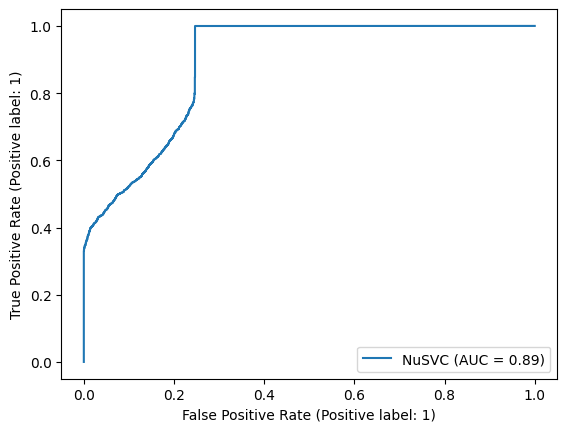

In [ ]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(clf_nsvm_shuffled, X_test_shuffled, y_test_shuffled)
plt.show()

## Training a Random Forest and Plotting the ROC Curve

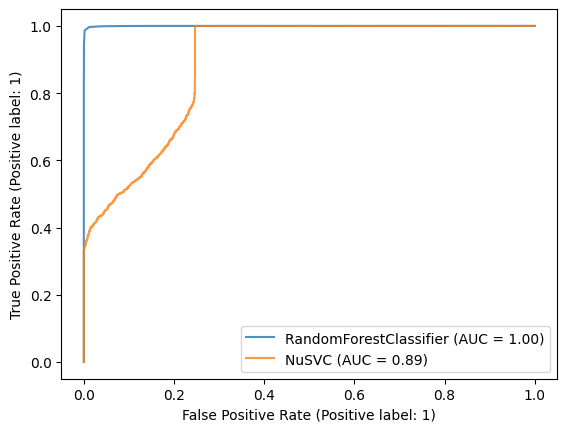

In [ ]:
clf_shuffled_rf = RandomForestClassifier(n_estimators=10, random_state=42)
clf_shuffled_rf.fit(X_train_shuffled, y_train_shuffled)
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(clf_shuffled_rf, X_test_shuffled, y_test_shuffled, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)

plt.show()

In [ ]:
clf_shuffled_rf.score(X_test_shuffled,y_test_shuffled)

0.9857779054733515

In [ ]:
clf_nsvm_shuffled.score(X_test_shuffled,y_test_shuffled)

0.896997557822152

In [ ]:
clf_svm_shuffled.score(X_test_shuffled,y_test_shuffled)

0.9984197672748168

# DEEP LEARNING MODEL!
now lets create our first deep learning model using tensorflow!

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

dl_model=Sequential()
dl_model.add(Dense(128, activation="relu", input_shape=(X_train.shape[1],)))
dl_model.add(Dense(64, activation="relu"))
dl_model.add(Dense(32, activation="relu"))
dl_model.add(Dense(1, activation="sigmoid"))

#compile the model
dl_model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

#train the model
history=dl_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)


Epoch 1/50
508/508 [==============================] - 4s 5ms/step - loss: 0.4587 - accuracy: 0.8158 - val_loss: 0.4136 - val_accuracy: 0.8355
Epoch 2/50
508/508 [==============================] - 2s 3ms/step - loss: 0.3936 - accuracy: 0.8515 - val_loss: 0.3733 - val_accuracy: 0.8555
Epoch 3/50
508/508 [==============================] - 3s 5ms/step - loss: 0.3614 - accuracy: 0.8583 - val_loss: 0.3546 - val_accuracy: 0.8589
Epoch 4/50
508/508 [==============================] - 3s 5ms/step - loss: 0.3425 - accuracy: 0.8667 - val_loss: 0.3267 - val_accuracy: 0.8680
Epoch 5/50
508/508 [==============================] - 2s 3ms/step - loss: 0.3175 - accuracy: 0.8722 - val_loss: 0.3025 - val_accuracy: 0.8760
Epoch 6/50
508/508 [==============================] - 2s 3ms/step - loss: 0.2944 - accuracy: 0.8792 - val_loss: 0.3029 - val_accuracy: 0.8693
Epoch 7/50
508/508 [==============================] - 2s 3ms/step - loss: 0.2746 - accuracy: 0.8845 - val_loss: 0.2982 - val_accuracy: 0.8849
Epoch 

In [ ]:
dl_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5376      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 15,745
Trainable params: 15,745
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dl_model.evaluate(X_test,y_test)

218/218 [==============================] - 1s 3ms/step - loss: 0.0368 - accuracy: 0.9891


[0.036807943135499954, 0.9890820384025574]

In [ ]:
len(X_test)

6961

In [ ]:
X_train.shape[1]

41

In [ ]:
dl_predictions= dl_model.predict(X_test)

218/218 [==============================] - 1s 2ms/step


In [ ]:
dl_predictions.shape

(6961, 1)

In [ ]:
len(dl_predictions)

6961

In [ ]:
from keras.losses import mean_squared_error
#calculate the error metric
dl_mse=mean_squared_error(y_test,dl_predictions)
print('Deep Learning MSE: ',dl_mse)

Deep Learning MSE:  tf.Tensor([0.6004884  0.39921677 0.39916125 ... 0.5850258  0.3995013  0.5525538 ], shape=(6961,), dtype=float32)


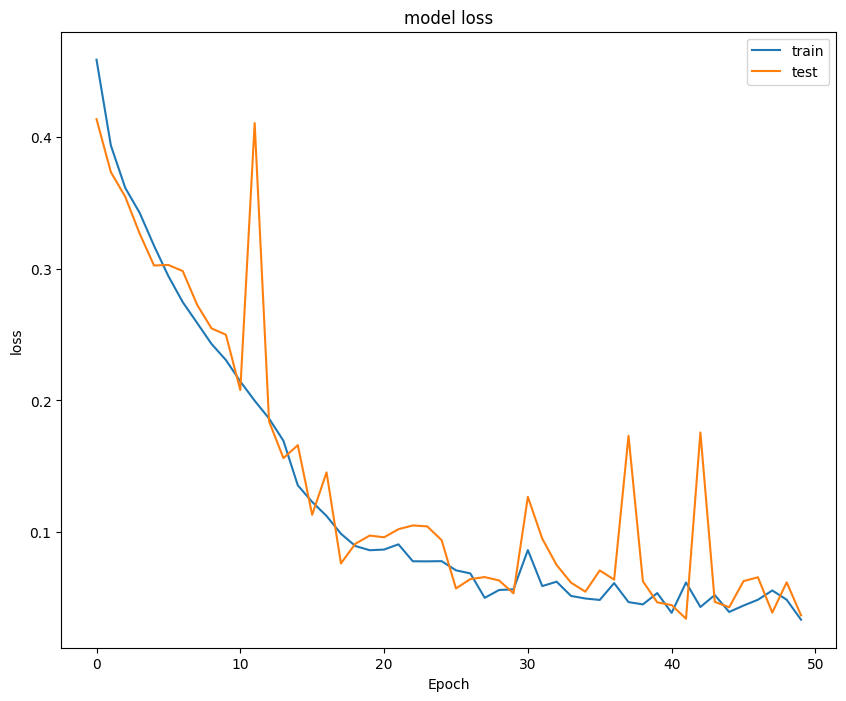

In [ ]:
#lets visualize the loss of training and validaton
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [ ]:
def compute_accuracy(Y_true, Y_pred):  
    correctly_predicted = 0  
    # iterating over every label and checking it with the true sample  
    for true_label, predicted in zip(Y_true, Y_pred):  
        if true_label == predicted:  
            correctly_predicted += 1  
    # computing the accuracy score  
    accuracy_score = correctly_predicted / len(Y_true)  
    return accuracy_score  

In [ ]:
dl_predictions[10]

array([7.707924e-09], dtype=float32)